Geração 0: Melhor fitness = 0.9820, Features selecionadas = 14/30
Geração 5: Melhor fitness = 0.9842, Features selecionadas = 13/30
Geração 10: Melhor fitness = 0.9842, Features selecionadas = 11/30
Geração 15: Melhor fitness = 0.9842, Features selecionadas = 11/30
Geração 20: Melhor fitness = 0.9842, Features selecionadas = 11/30
Geração 25: Melhor fitness = 0.9842, Features selecionadas = 11/30
Geração 30: Melhor fitness = 0.9842, Features selecionadas = 11/30
Geração 35: Melhor fitness = 0.9842, Features selecionadas = 11/30
Geração 40: Melhor fitness = 0.9842, Features selecionadas = 11/30
Geração 45: Melhor fitness = 0.9864, Features selecionadas = 11/30

Resultado após 50 gerações:
Melhor fitness: 0.986447
Número de features selecionadas: 11/30
Índices das features selecionadas: [ 1  3  6  7 12 15 20 21 23 26 27]


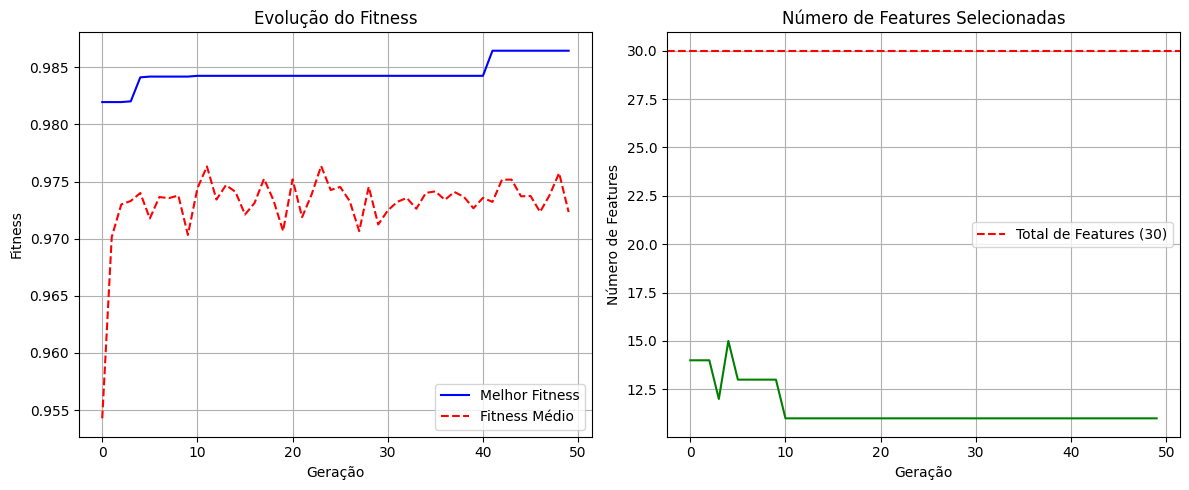

Acurácia no conjunto de teste: 0.9737
Acurácia com todas as features: 0.9737

Features selecionadas:
- mean texture
- mean area
- mean concavity
- mean concave points
- perimeter error
- compactness error
- worst radius
- worst texture
- worst area
- worst concavity
- worst concave points


In [1]:
# Exemplo de uso com dataset
# -*- coding: utf-8 -*-
"""Testa o algoritmo GA-WOA em um dataset para seleção de features."""
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from ga_woa import GAWOA

# Este exemplo utiliza o dataset de câncer de mama disponível no scikit-learn.
# Carrega o dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Normaliza os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define o classificador para avaliar as features
classifier = SVC(gamma='auto')

# Cria e executa o algoritmo híbrido
gawoa = GAWOA(X_train, y_train, classifier=classifier, cv=5)
best_solution, best_fitness, selected_features = gawoa.run()

# Avalia o modelo final usando apenas as features selecionadas
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Treina o modelo final
final_model = SVC(gamma='auto')
final_model.fit(X_train_selected, y_train)

# Avalia no conjunto de teste
test_accuracy = final_model.score(X_test_selected, y_test)
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")

# Compara com o modelo usando todas as features
full_model = SVC(gamma='auto')
full_model.fit(X_train, y_train)
full_accuracy = full_model.score(X_test, y_test)
print(f"Acurácia com todas as features: {full_accuracy:.4f}")

# Imprime os nomes das features selecionadas
if hasattr(data, 'feature_names'):
    selected_names = [data.feature_names[i] for i in selected_features]
    print("\nFeatures selecionadas:")
    for name in selected_names:
        print(f"- {name}")

